In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salary_data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df = df[['Years of Experience','Salary']]
df

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
370,8.0,85000.0
371,19.0,170000.0
372,2.0,40000.0
373,7.0,90000.0


Text(0, 0.5, 'Salary')

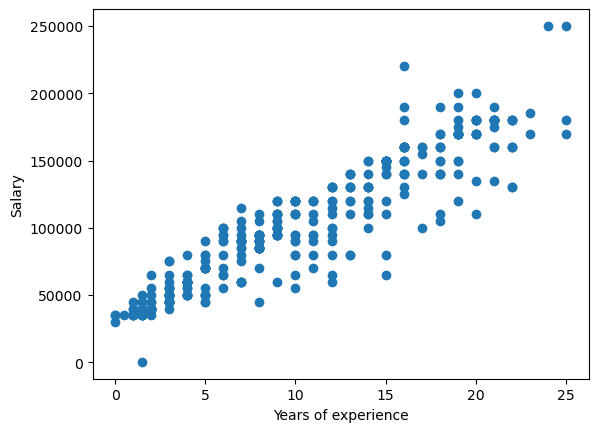

In [6]:
#scatter 
plt.scatter(df['Years of Experience'], df['Salary']) 
plt.xlabel('Years of experience')
plt.ylabel('Salary')

In [7]:
##correlation
df.corr()

,Years of Experience,Salary
Years of Experience,1.000000,0.930338
Salary,0.930338,1.000000


C:\Users\nisch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


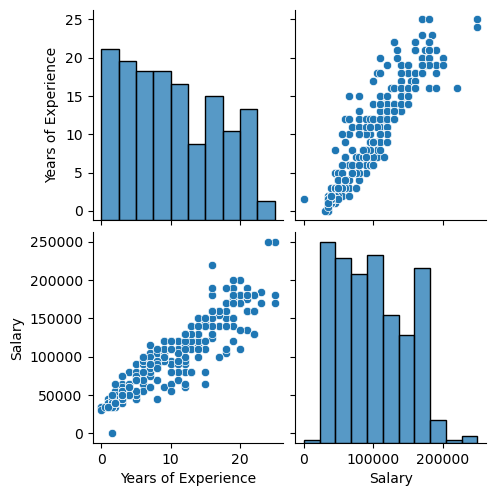

In [8]:
import seaborn as sns
sns.pairplot(df)

In [23]:
df = df.dropna()
df.isna().sum()

Years of Experience    0
Salary                 0
dtype: int64

In [55]:
# dependent and independent feature
X = df[['Years of Experience']]
Y = df[['Salary']]
 


In [56]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)
  

In [57]:
#standardization
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression = LinearRegression(n_jobs = -1)

In [61]:
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [62]:
print("coefficient or slop:",regression.coef_)
print("Intercept:", regression.intercept_)

coefficient or slop: [[44255.42456942]]
Intercept: [100269.24290221]


In [67]:
from sklearn.metrics import r2_score

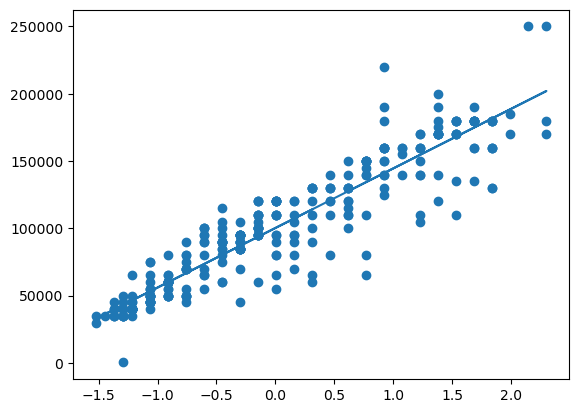

In [63]:
## plot best fit line wrt to training data
plt.scatter(X_train, Y_train)
plt.plot(X_train,regression.predict(X_train))

In [64]:
##prediction for test data
y_pred = regression.predict(X_test)

In [68]:
score = r2_score(Y_test, y_pred)
print(score)

0.8988434983123152


In [65]:
regression.predict(scaler.transform([[2.5]]))

C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[49661.45800407]])

In [66]:
from sklearn.metrics import accuracy_score
predict = regression.predict(X_test)
print(accuracy_score(Y_test,predict)*100)
print('\n')


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets